In [1]:
import os
import keras 
import numpy as np 
import pandas as pd 
import keras.backend as K
from datetime import timedelta
plt.style.use('fivethirtyeight')
from keras.optimizers import Adam
from sklearn.preprocessing import *
from keras.models import Sequential
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
from numpy.lib.stride_tricks import as_strided
from keras.layers import Dense, LSTM, Flatten, Activation

Using TensorFlow backend.


['test', 'train.csv', 'sample_submission.csv']


### Prepare data

In [2]:
train_df = pd.read_csv("../input/train.csv", nrows=10000000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})
train_df.head(5)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [3]:
X = train_df["time_to_failure"]
y = train_df["acoustic_data"]
X_train = X.iloc[:3000000]
y_train = y.iloc[:3000000]
X_val = X.iloc[2700000:3000000]
y_val = y.iloc[2700000:3000000]
X_test = X.iloc[3000001:4000000]
y_test = y.iloc[3000001:4000000]

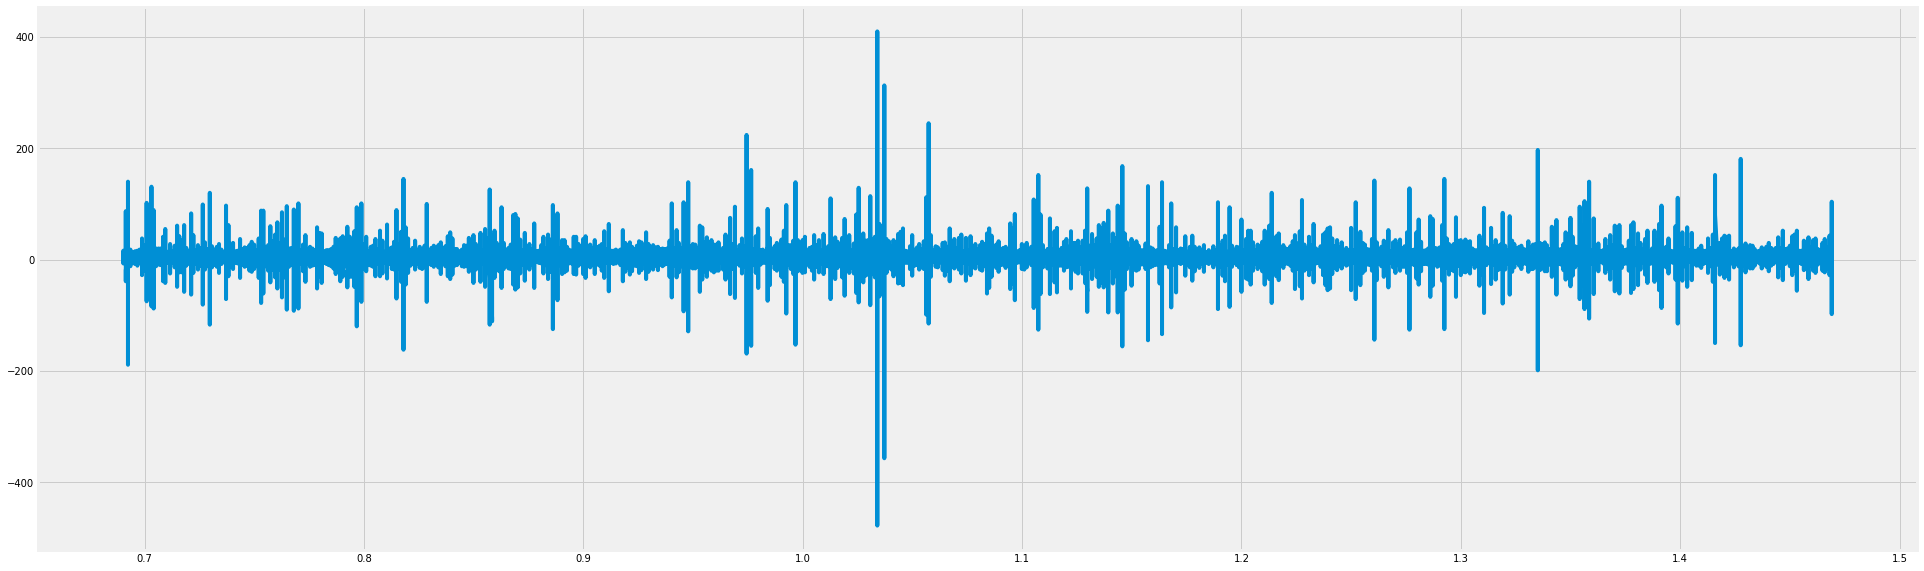

In [4]:
plt.figure(figsize=(30,10))
plt.plot(X_train, y_train)

In [5]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values
X_val = X_val.values
y_val = y_val.values
X_train = X_train.reshape(X_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)
X_val = X_val.reshape(X_val.shape[0], 1)

### Data processing

In [6]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])
X_val = X_val.reshape(X_val.shape[0],1,X_val.shape[1])

In [7]:
keras.utils.normalize(X_train, axis=-1, order=2)
keras.utils.normalize(X_val, axis=-1, order=2)
keras.utils.normalize(X_test, axis=-1, order=2)
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])
X_val = X_val.reshape(X_val.shape[0],1,X_val.shape[1])

In [8]:
X_train.shape

(3000000, 1, 1)

### Model Training

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 3000000 samples, validate on 300000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


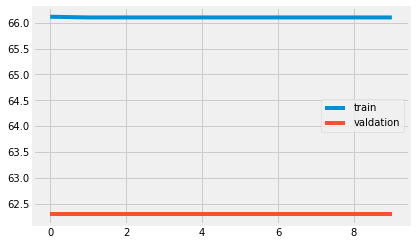

In [9]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dense(1))
model.add(Activation('tanh')) 
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) 
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=10, batch_size=50, validation_data=(X_val, y_val), verbose = 5, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valdation')
plt.legend()
plt.show()

### Predict and Result

In [11]:

y_pre = model.predict(X_test)


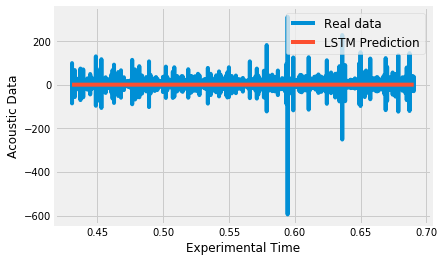

In [12]:
x_test_1D = X.iloc[3000001:4000000]
x_test_1D = x_test_1D.values
plt.plot(x_test_1D, y_test)
plt.plot(x_test_1D, y_pre) 
plt.ylabel('Acoustic Data', fontsize=12)
plt.xlabel('Experimental Time', fontsize=12)
plt.legend(('Real data','LSTM Prediction'), fontsize=12, loc=1)